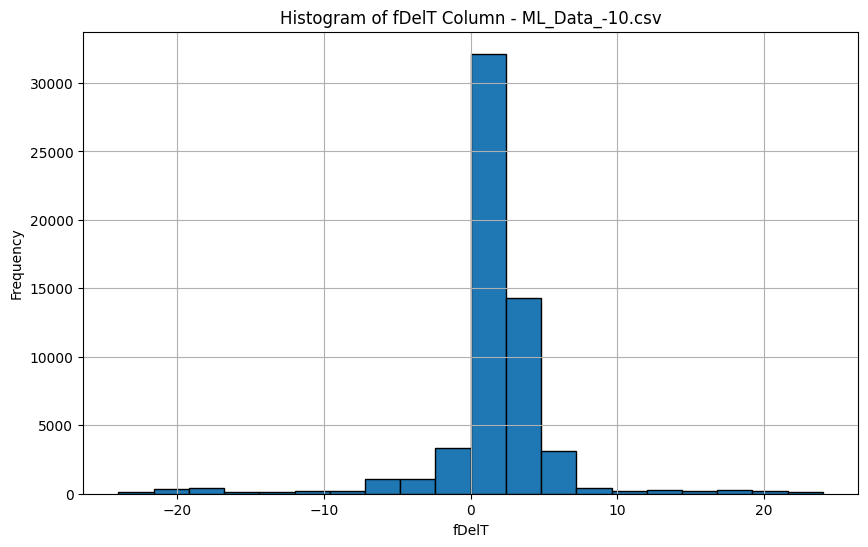

File: ML_Data_-10.csv
Average fDelT: 1.4541447266864485
Mode fDelT: 2
Standard Deviation fDelT: 4.296542619334418
----------------------------------------


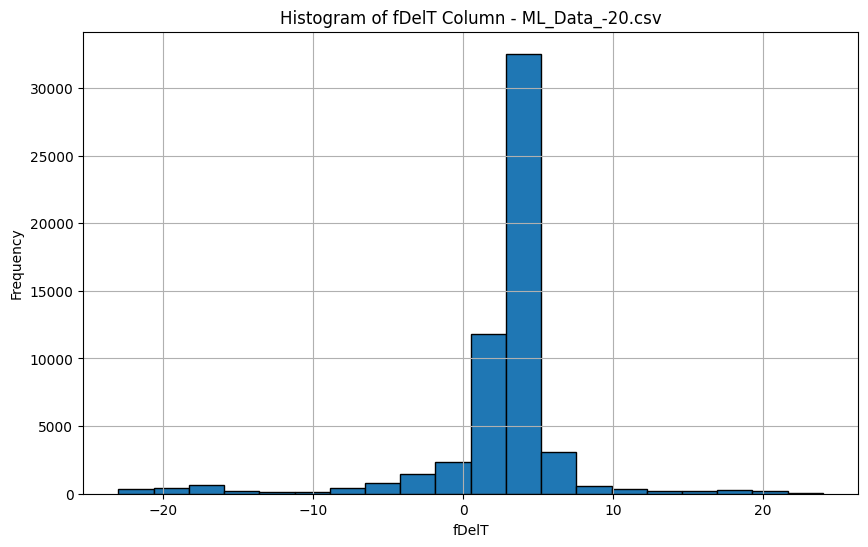

File: ML_Data_-20.csv
Average fDelT: 2.519488396154052
Mode fDelT: 4
Standard Deviation fDelT: 4.798537636329686
----------------------------------------


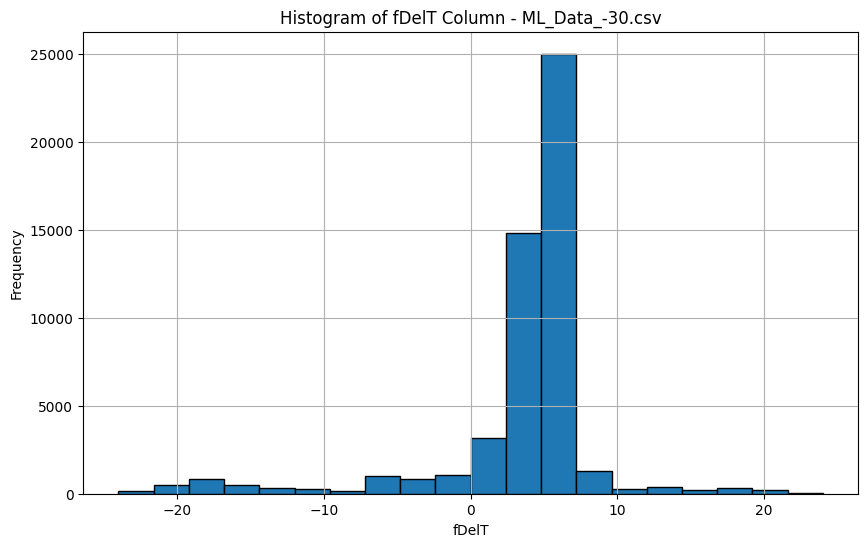

File: ML_Data_-30.csv
Average fDelT: 3.4122687439143133
Mode fDelT: 5
Standard Deviation fDelT: 5.7283848586058035
----------------------------------------


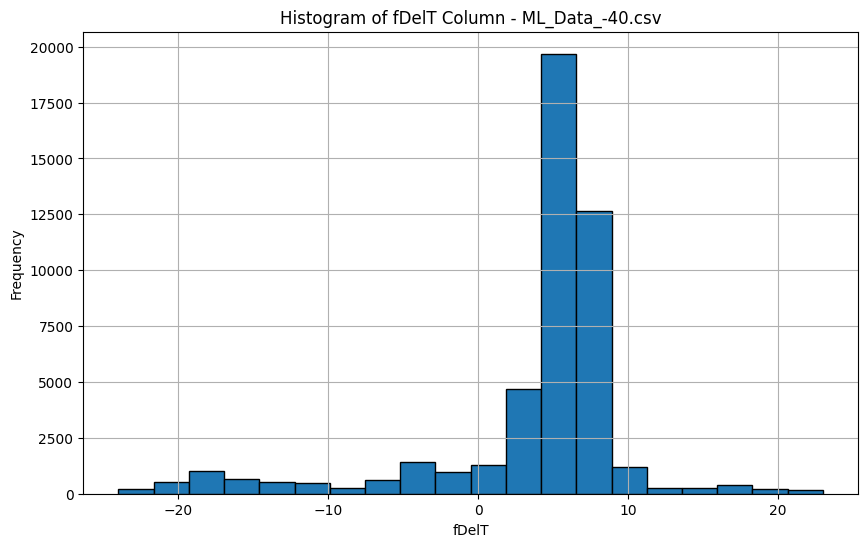

File: ML_Data_-40.csv
Average fDelT: 3.8469353342888457
Mode fDelT: 6
Standard Deviation fDelT: 6.746043617681059
----------------------------------------


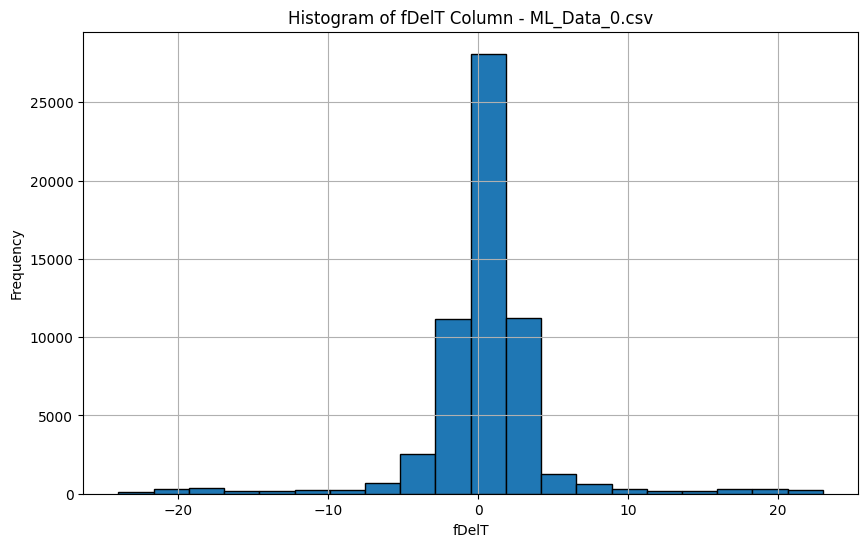

File: ML_Data_0.csv
Average fDelT: 0.37775656975357036
Mode fDelT: 0
Standard Deviation fDelT: 4.242589767772144
----------------------------------------


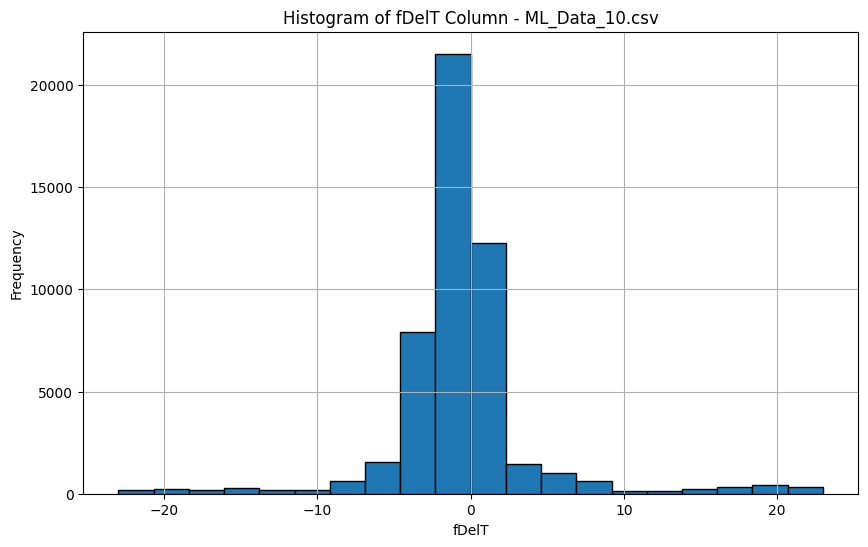

File: ML_Data_10.csv
Average fDelT: -0.8244311666364899
Mode fDelT: -1
Standard Deviation fDelT: 4.693440434106171
----------------------------------------


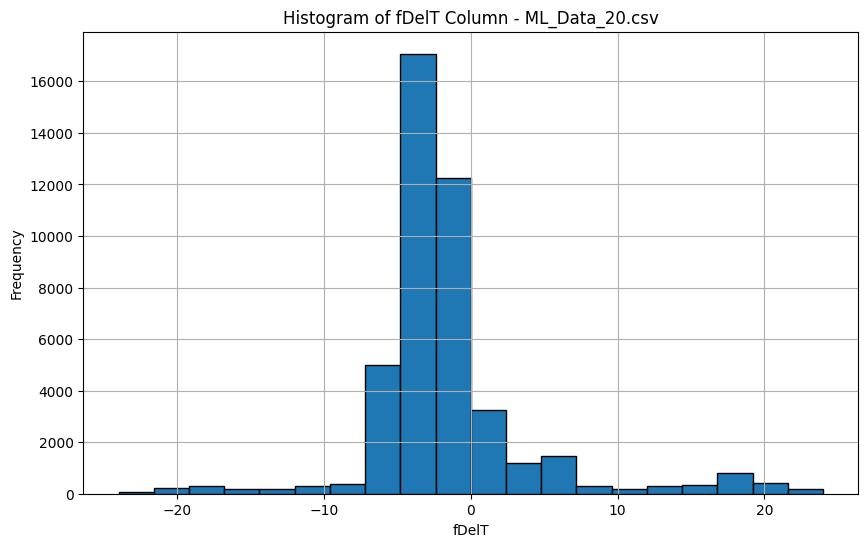

File: ML_Data_20.csv
Average fDelT: -1.6782037388241668
Mode fDelT: -3
Standard Deviation fDelT: 5.6162138596802125
----------------------------------------


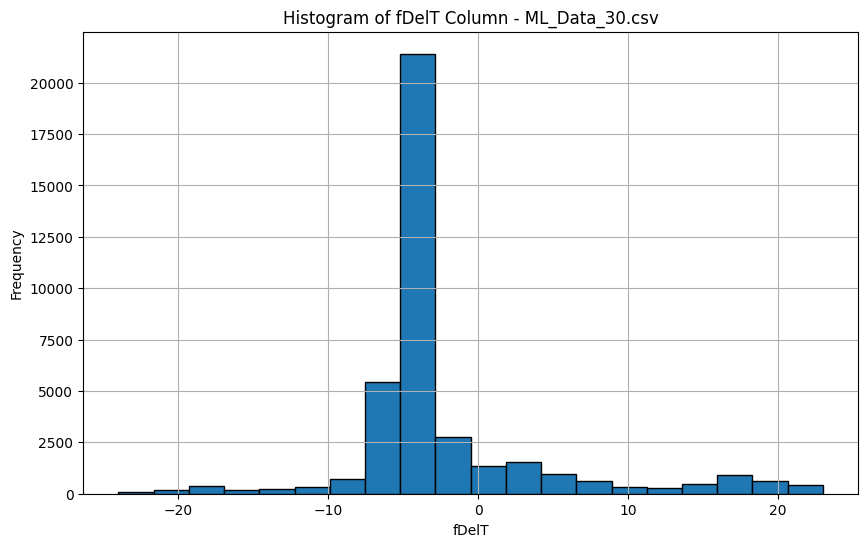

File: ML_Data_30.csv
Average fDelT: -2.328123007879236
Mode fDelT: -4
Standard Deviation fDelT: 6.713701594099919
----------------------------------------


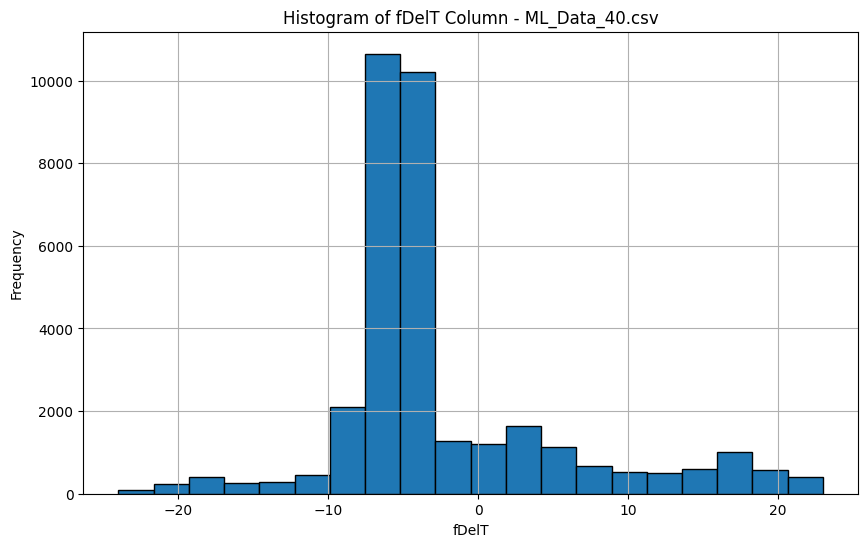

File: ML_Data_40.csv
Average fDelT: -2.507771718526727
Mode fDelT: -6
Standard Deviation fDelT: 7.795068916435977
----------------------------------------


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# List of CSV files
csv_files = glob.glob('ML_Data_*.csv')

# Function to calculate statistics and plot histogram for a single file
def analyze_file(file):
    data = pd.read_csv(file)
    
    average_fDelT = data['fDelT'].mean()
    mode_fDelT = data['fDelT'].mode()[0] if not data['fDelT'].mode().empty else None
    std_dev_fDelT = data['fDelT'].std()

    plt.figure(figsize=(10, 6))
    plt.hist(data['fDelT'], bins=20, edgecolor='black')
    plt.title(f'Histogram of fDelT Column - {file}')
    plt.xlabel('fDelT')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    print(f'File: {file}')
    print(f'Average fDelT: {average_fDelT}')
    print(f'Mode fDelT: {mode_fDelT}')
    print(f'Standard Deviation fDelT: {std_dev_fDelT}')
    print('-' * 40)

# Analyze each file
for file in csv_files:
    analyze_file(file)


Regression Equation: dist = -11.06 * avg_fDelT + 5.25


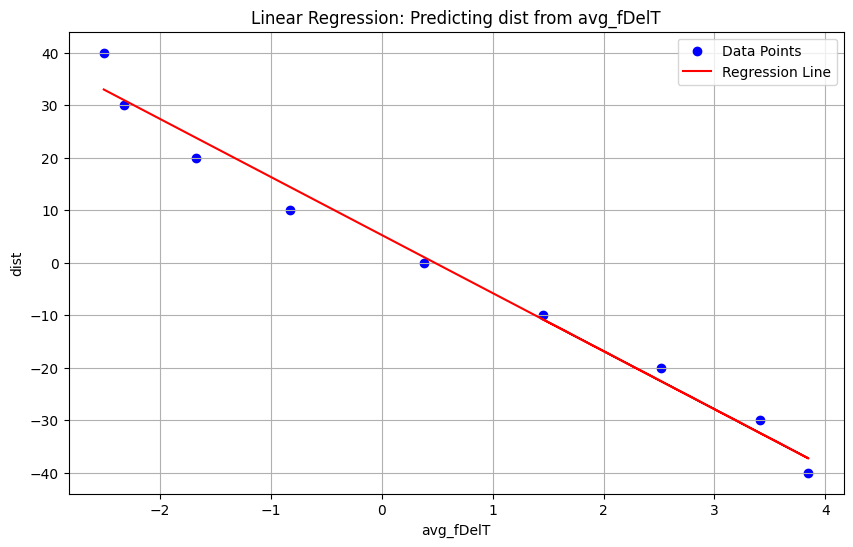

In [11]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = glob.glob('ML_Data_*.csv')

# Initialize arrays to store data for linear regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    avg_fDelT = data['fDelT'].mean()
    
    independent_feature.append(avg_fDelT)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(independent_feature, dependent_feature)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the regression line
equation = f'dist = {slope:.2f} * avg_fDelT + {intercept:.2f}'
print('Regression Equation:', equation)

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(independent_feature, model.predict(independent_feature), color='red', label='Regression Line')
plt.title('Linear Regression: Predicting dist from avg_fDelT')
plt.xlabel('avg_fDelT')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the trained linear regression model (replace with your trained model)
# model = load_model('path_to_your_trained_model')

# Test file names
test_files = ['ML_Test_Data_1.csv', 'ML_Test_Data_2.csv', 'ML_Test_Data_3.csv']

# Initialize arrays to store data for prediction
avg_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['fDelT'].mean()
    
    avg_fDelT_test.append(avg_fDelT)

# Reshape the data array
avg_fDelT_test = np.array(avg_fDelT_test).reshape(-1, 1)

# Predict dist using the trained model
predicted_dist = model.predict(avg_fDelT_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: ML_Test_Data_1.csv, Predicted dist: 31.77
Test File: ML_Test_Data_2.csv, Predicted dist: 22.22
Test File: ML_Test_Data_3.csv, Predicted dist: -27.75


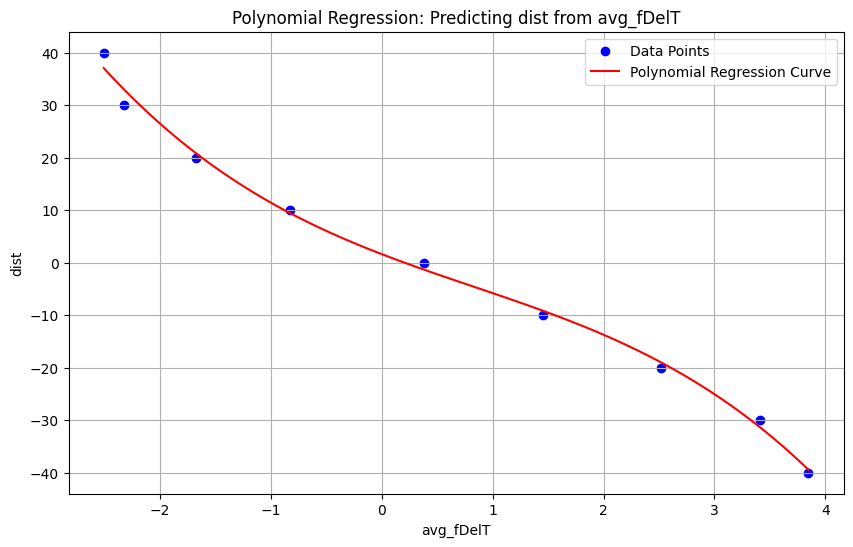

Polynomial Regression Equation: dist = 0.00 + -8.13 * avg_fDelT^1 + 1.19 * avg_fDelT^2 + -0.48 * avg_fDelT^3


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import glob
import matplotlib.pyplot as plt

# List of CSV files
csv_files = glob.glob('ML_Data_*.csv')

# Initialize arrays to store data for polynomial regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    avg_fDelT = data['fDelT'].mean()
    
    independent_feature.append(avg_fDelT)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Perform polynomial regression up to degree 10
degree = 3
poly_features = PolynomialFeatures(degree=degree)
independent_feature_poly = poly_features.fit_transform(independent_feature)

model = LinearRegression()
model.fit(independent_feature_poly, dependent_feature)

# Generate points for the polynomial regression curve
x_range = np.linspace(independent_feature.min(), independent_feature.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))
predicted_y = model.predict(x_range_poly)

# Plot the data points and polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(x_range, predicted_y, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from avg_fDelT')
plt.xlabel('avg_fDelT')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()

# Get the coefficients of the polynomial regression
coefficients = model.coef_
intercept = model.intercept_

# Create the equation string
equation = f'dist = {coefficients[0]:.2f}'
for i in range(1, degree+1):
    equation += f' + {coefficients[i]:.2f} * avg_fDelT^{i}'
print('Polynomial Regression Equation:', equation)


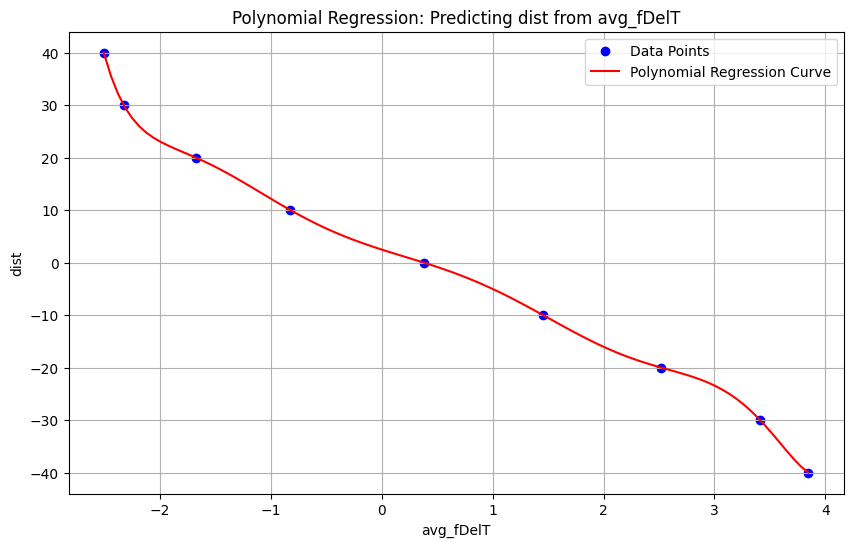

Polynomial Regression Equation: dist = -0.00 + -6.76 * avg_fDelT^1 + 1.50 * avg_fDelT^2 + -2.38 * avg_fDelT^3 + -0.40 * avg_fDelT^4 + 0.59 * avg_fDelT^5 + -0.02 * avg_fDelT^6 + -0.03 * avg_fDelT^7 + 0.01 * avg_fDelT^8 + -0.00 * avg_fDelT^9 + 0.00 * avg_fDelT^10


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import glob
import matplotlib.pyplot as plt

# List of CSV files
csv_files = glob.glob('ML_Data_*.csv')

# Initialize arrays to store data for polynomial regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    avg_fDelT = data['fDelT'].mean()
    
    independent_feature.append(avg_fDelT)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Perform polynomial regression up to degree 10
degree = 10
poly_features = PolynomialFeatures(degree=degree)
independent_feature_poly = poly_features.fit_transform(independent_feature)

model = LinearRegression()
model.fit(independent_feature_poly, dependent_feature)

# Generate points for the polynomial regression curve
x_range = np.linspace(independent_feature.min(), independent_feature.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))
predicted_y = model.predict(x_range_poly)

# Plot the data points and polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(x_range, predicted_y, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from avg_fDelT')
plt.xlabel('avg_fDelT')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()

# Get the coefficients of the polynomial regression
coefficients = model.coef_
intercept = model.intercept_

# Create the equation string
equation = f'dist = {coefficients[0]:.2f}'
for i in range(1, degree+1):
    equation += f' + {coefficients[i]:.2f} * avg_fDelT^{i}'
print('Polynomial Regression Equation:', equation)


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import glob

# Load the trained polynomial regression model (replace with your trained model)
# model = load_model('path_to_your_trained_model')

# Test file names
test_files = glob.glob('ML_Test_Data_*.csv')

# Initialize arrays to store data for prediction
avg_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['fDelT'].mean()
    
    avg_fDelT_test.append(avg_fDelT)

# Reshape the data array
avg_fDelT_test = np.array(avg_fDelT_test).reshape(-1, 1)

# Perform polynomial transformation for the test data
degree = 10  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
avg_fDelT_test_poly = poly_features.fit_transform(avg_fDelT_test)

# Predict dist using the trained polynomial regression model
predicted_dist = model.predict(avg_fDelT_test_poly)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    dist_suffix = file.split('_')[-1].split('.')[0]
    print(f"Test File: {file}, Predicted dist for '{dist_suffix}': {predicted_dist[i]:.2f}")


Test File: ML_Test_Data_1.csv, Predicted dist for '1': 33.12
Test File: ML_Test_Data_2.csv, Predicted dist for '2': 18.59
Test File: ML_Test_Data_3.csv, Predicted dist for '3': -23.26
